<a href="https://colab.research.google.com/github/bishalkharel/Diabetes-detection-using-deeplearning/blob/master/Diabetes_detection_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://nrvis.com/./data/mldata/pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




All of the input variables that describe each patient are numerical.

Hence, load the file as a matrix of numbers using the NumPy function loadtxt().

There are eight input variables and one output variable (the last column). We will be learning a model to map rows of input variables (X) to an output variable (y), which we often summarize as y = f(X)

The variables can be summarized as follows:

Input Variables (X):

    Number of times pregnant
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    Diastolic blood pressure (mm Hg)
    Triceps skin fold thickness (mm)
    2-Hour serum insulin (mu U/ml)
    Body mass index (weight in kg/(height in m)^2)
    Diabetes pedigree function
    Age (years)

Output Variables (y):

    Class variable (0 or 1)



In [ ]:
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',  
         'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Method 2 to load data


In [ ]:
# load the dataset
dataset = loadtxt('https://nrvis.com/./data/mldata/pima-indians-diabetes.csv', delimiter=',')


In [ ]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:


# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]



In [ ]:


X_scaled = scale(X) 
print('Scaled_X:\n', X_scaled)



Scaled_X:
 [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
# Split dataset into 'train' & 'test' sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [ ]:


# (optional): one hot encoding??
y_train = np_utils.to_categorical(y_train)

print('Y_Train Encoded:\n', y_train)



Y_Train Encoded:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]



2. Define Keras Model

The model design:

    3 layers.
    22 total neurons.
    Relu & Sigmoid activation functions.



In [ ]:


# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))



3. Compile Keras Model

In [ ]:


# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10)
# model.fit(X, y, epochs=150, batch_size=10, verbose=0)


Epoch 1/150
35/35 [==============================] - 2s 18ms/step - loss: 0.7588 - accuracy: 0.4070 - val_loss: 0.7075 - val_accuracy: 0.5353
Epoch 2/150
35/35 [==============================] - 0s 4ms/step - loss: 0.7051 - accuracy: 0.5872 - val_loss: 0.6740 - val_accuracy: 0.6941
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.6678 - accuracy: 0.7180 - val_loss: 0.6482 - val_accuracy: 0.6941
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.7587 - val_loss: 0.6243 - val_accuracy: 0.7059
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.7674 - val_loss: 0.6018 - val_accuracy: 0.6882
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5731 - accuracy: 0.7674 - val_loss: 0.5794 - val_accuracy: 0.7118
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7791 - val_loss: 0.5618 - val_accuracy: 0.7176
Epoch 8/150



5. Evaluate Model

In [ ]:


# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))



17/17 [==============================] - 0s 3ms/step - loss: 0.3800 - accuracy: 0.8230
Accuracy: 82.30



6. Predictions

In [ ]:


# make class predictions with the model
predictions = np.argmax(model.predict(X_test), axis=-1)
# summarize the first 5 cases
for i in range(10):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y[i]))



[0.6399472601593618, -0.7165334717264664, -0.5741277459136239, 0.7818138030884967, 0.956859653030945, 0.2547804694892943, -0.1264714020604746, 0.8303811324799336] => 0 (expected 1)
[-0.5479185907225473, -0.2783734371474431, 0.30473400231574344, 0.7190857419965655, -0.6928905722954664, 0.47054318659717476, -0.9781448690748636, -1.0415494364835027] => 0 (expected 0)
[-0.5479185907225473, -0.4035620184557355, -0.2639412465385531, -1.2882122129452327, -0.6928905722954664, -0.1513611156549505, -0.9479436823013037, -1.0415494364835027] => 0 (expected 1)
[1.233880185600316, -0.4348591637828086, 0.5632227517949692, -1.2882122129452327, -0.6928905722954664, -0.9382604368719248, 1.1600991544931767, 0.06459135426761878] => 0 (expected 0)
[0.9369137228798391, 0.4727580507023112, 1.0802002507534205, -1.2882122129452327, -0.6928905722954664, -0.26558843647676966, -0.7908975110787921, 1.4259954044228451] => 0 (expected 1)
[0.6399472601593618, -0.560047745091101, 0.149640752628208, 0.7190857419965655,

In [ ]:
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1) 

accuracy_score(y_test, y_pred)


0.7047244094488189

In [ ]:
print(model.metrics_names)


['loss', 'accuracy']




One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.

The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned

In [ ]:


print(history.history.keys())



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])



7. Plot against loss and accuracy

The plots can provide an indication of useful things about the training of the model, such as:

    It’s speed of convergence over epochs (slope).
    Whether the model may have already converged (plateau of the line).
    Whether the mode may be over-learning the training data (inflection for validation line).



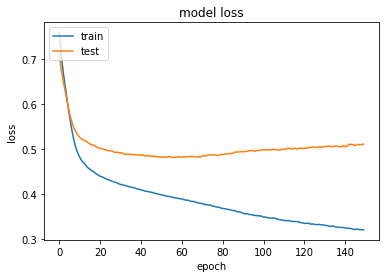

In [ ]:


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



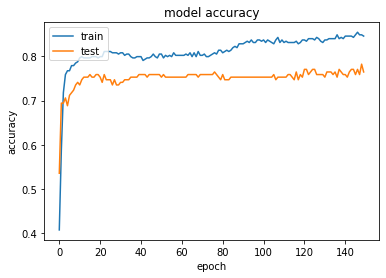

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
